<a href="https://colab.research.google.com/github/NataMaru/ML_for_people_tasks/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error ,mean_absolute_error

In [206]:
medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [207]:
X=non_smoker_df['age']
y=non_smoker_df['charges']

##Методу МНК (з використанням тільки numpy, без scikit learn)

In [208]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [209]:
# Додаємо колонку одиничок (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [210]:
# коефіцієнти моделі
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [211]:
#прогнози моделі
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

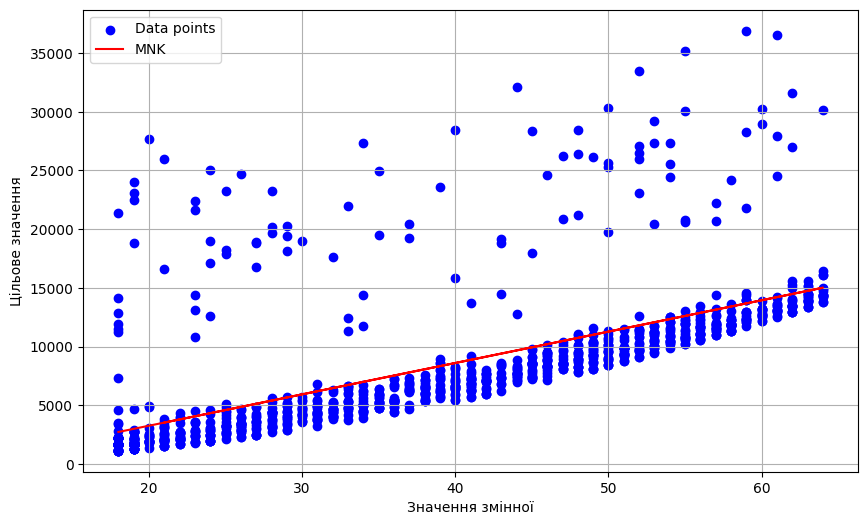

In [212]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

##Full-Batch градієнтного спуску з numpy

In [213]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


In [214]:
X_arr=X.to_numpy()
X_new=np.expand_dims(X_arr, axis=1)

In [215]:
m_1, b_1, errors_1 = full_batch_gradient_descent(X_new, y, lr=0.00001, epochs=10000)
predictions_fbgd_1 = m_1 * X_new[:, 0] + b_1 #прогнози моделі
m_1, b_1 # коефіцієнти моделі

(np.float64(221.10457373276387), np.float64(-41.980795673907885))

In [216]:

m_2, b_2, errors_2 = full_batch_gradient_descent(X_new, y, lr=0.0001, epochs=10000)
predictions_fbgd_2 = m_2 * X_new[:, 0] + b_2 #прогнози моделі
m_2, b_2 # коефіцієнти моделі

(np.float64(229.6120874611436), np.float64(-419.83076041335335))

In [217]:
m_3, b_3, errors_3 = full_batch_gradient_descent(X_new, y, lr=0.00000001, epochs=10000)
predictions_fbgd_3 = m_3 * X_new[:, 0] + b_3 #прогнози моделі
m_3, b_3 # коефіцієнти моделі

(np.float64(64.99243563966128), np.float64(1.415850672035204))

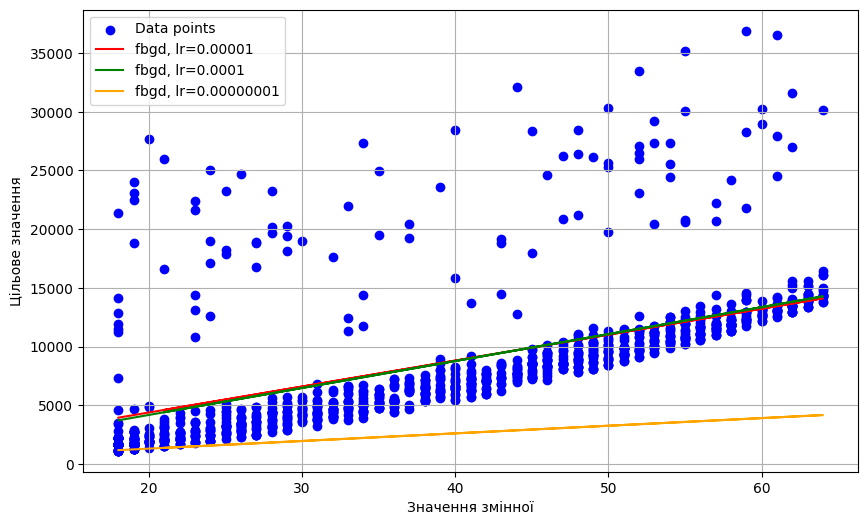

In [218]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd_1, color='red', label='fbgd, lr=0.00001')
plt.plot(X, predictions_fbgd_2, color='green', label='fbgd, lr=0.0001')
plt.plot(X, predictions_fbgd_3, color='orange', label='fbgd, lr=0.00000001')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

### графік помилки в залежності від ітерації.

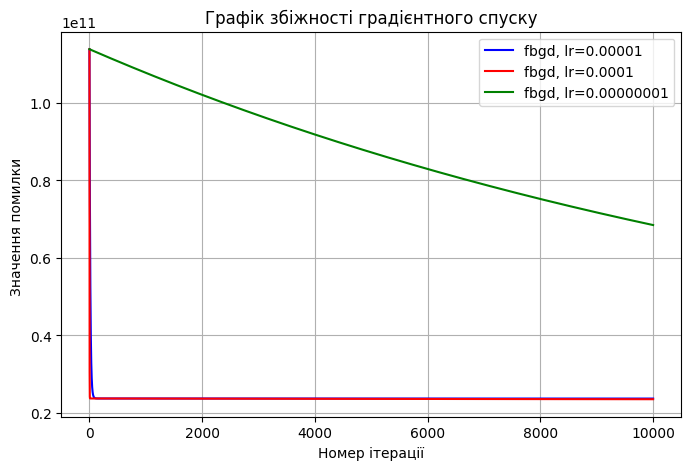

In [219]:

plt.figure(figsize=(8, 5))
plt.plot(range(10000), errors_1, color='blue',label='fbgd, lr=0.00001')
plt.plot(range(10000), errors_2, color='red',  label='fbgd, lr=0.0001')
plt.plot(range(10000), errors_3, color='green', label='fbgd, lr=0.00000001')
plt.title('Графік збіжності градієнтного спуску')
plt.xlabel('Номер ітерації')
plt.ylabel('Значення помилки ')
plt.legend()
plt.grid(True)
plt.show()

##scikit-learn.LinearRegression

In [220]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [221]:
lin_reg.fit(X_new ,y)
# коефіцієнти моделі
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [222]:
#прогнози моделі
predictions_sklearn = lin_reg.predict(X_new)

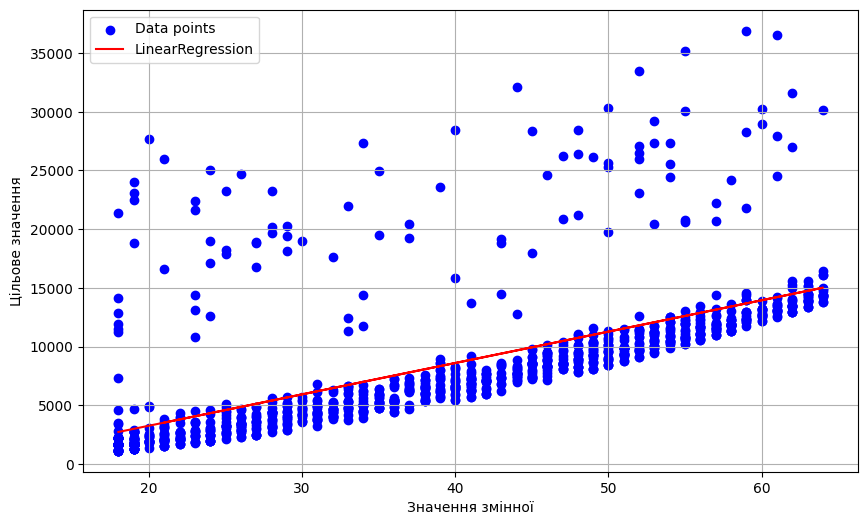

In [223]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='LinearRegression')

plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

##відобразмо на графіку наші дані та результати трьох методів

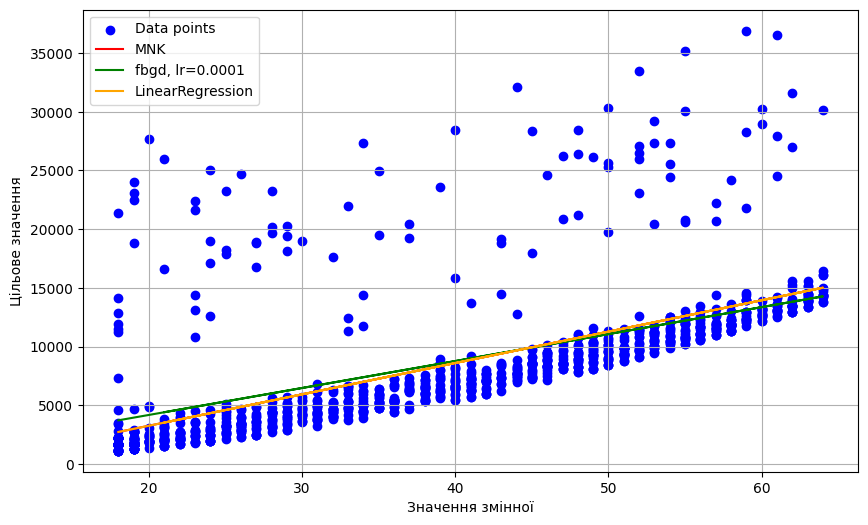

In [224]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd_2, color='green', label='fbgd, lr=0.0001')
plt.plot(X, predictions_sklearn, color='orange', label='LinearRegression')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
#розрахунок RMSE

rmse = root_mean_squared_error(y, predictions_MNK)
print('RMSE МНК: ', rmse)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd_2 )
print('RMSE град. спуску: ', rmse_fbgd)

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4696.325151433864
RMSE sklearn:  4662.505766636395


In [226]:
# розрахунок основних метрик для порівняння з RMSE
np.mean(y), np.std(y), np.min(y),np.median(y)

(np.float64(8434.268297856204),
 5990.964530287611,
 1121.8739,
 np.float64(7345.4053))

In [227]:
#mean_absolute_error
MAE = mean_absolute_error(y, predictions_MNK)
print('MAE МНК: ', MAE)

MAE_fbgd = mean_absolute_error(y, predictions_fbgd_2 )
print('MAE град. спуску: ', MAE_fbgd)

MAE_sklearn = mean_absolute_error(y, predictions_sklearn)
print('MAE sklearn: ', MAE_sklearn)

MAE МНК:  2580.5232282116117
MAE град. спуску:  2756.2128121283754
MAE sklearn:  2580.5232282116044


###висновки
1. з огляду на розмір RMSE та MAE, які мають співвідношення 2:1, існують викиди, до яких середньоквадратична похибка є чутливою
2. з огляду на результати прогнозу краще відіграла модель лін регресії з Scikit-learn
3.  також варто відмітити, що RMSE складає 50% від середнього і видається, що для нашої цільової змінної charges це забагато.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [228]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [229]:
X_smoker=smoker_df['age']
y_smoker=smoker_df['charges']

In [230]:
X_smoker_new=np.expand_dims(X_smoker, axis=1)

In [231]:
lin_reg.fit(X_smoker_new ,y_smoker)
# коефіцієнти моделі
coef_y_smoker=lin_reg.coef_
intercept_smoker=lin_reg.intercept_
coef_y_smoker,intercept_smoker

(array([305.23760211]), np.float64(20294.128126915966))

In [232]:
#прогнози моделі
predictions_sklearn_smoker= lin_reg.predict(X_smoker_new)

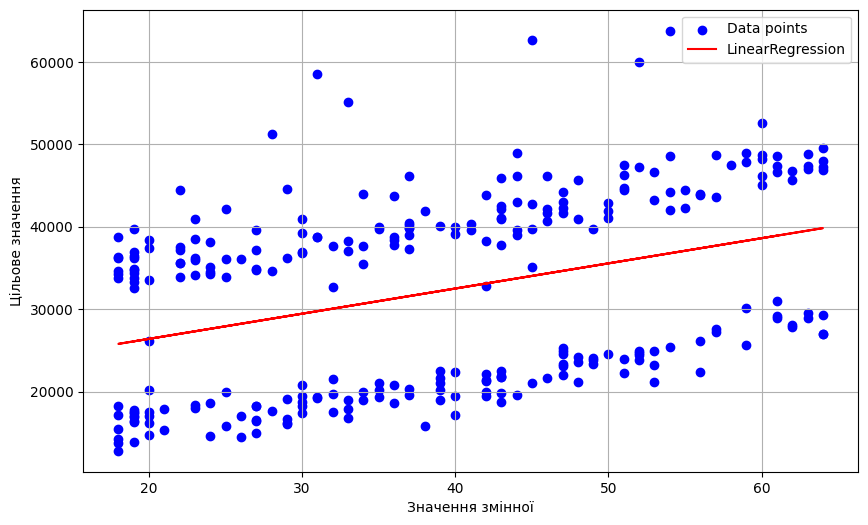

In [233]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn_smoker, color='red', label='LinearRegression')

plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [234]:
rmse_sklearn_smoker = root_mean_squared_error(y_smoker, predictions_sklearn_smoker_)
print('RMSE sklearn: ', rmse_sklearn_smoker)

MAE_sklearn_smoker = mean_absolute_error(y_smoker, predictions_sklearn_smoker)
print('MAE sklearn: ', MAE_sklearn_smoker)

print('median: ', np.median(y_smoker))

print('mean: ', np.mean(y_smoker))

print('STD: ', np.std(y_smoker))

RMSE sklearn:  10711.00334810241
MAE sklearn:  10097.800577858732
median:  34456.348450000005
mean:  32050.23183153284
STD:  11520.466706529429


###висновки
1. з огляду на графік хотілось би сказати, що модель погано прогнозує дані, оскільки скупчення точок знаходиться над або під лінією. Проте якщо подивитись на помилку моделі як абсолютну так і середрьоквадратичну і їх співвіднощення до середнього і медіани, то модель не виглядає такою уж поганою. Можливо як перша ітерація вона має місце на життя, але інші методи пронозу також варто було б спробувати.